<a href="https://colab.research.google.com/github/lineeteles/conhecimento-basico-em-Git-e-GitHub/blob/main/C%C3%B3pia_de_BD_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BD Projeto


## 1 Importando Bibliotecas Necessárias.

- os: Para manipulação de diretórios e caminhos de arquivos.

- pandas: Para carregar e manipular os dados do CSV.

- matplotlibe seaborn: Para criação de gráficos e visualização de dados.

- datetime: Para manipulação de dados no Python.

In [ ]:
import os   # Biblioteca para manipulação de diretórios e arquivos
import pandas as pd   # Biblioteca para análise e manipulação de dados
import matplotlib.pyplot as plt   # Biblioteca para criação de gráficos
from matplotlib import rcParams   # Parâmetros de configuração do Matplotlib
import seaborn as sns   # Biblioteca para visualização de dados baseada no Matplotlib
from datetime import datetime   # Biblioteca para manipulação de
from google.colab import files # Importando arquivos do desktop

## 1.2 Configurações de estilo para os gráficos

- Definimos o estilo e a paleta de cores dos gráficos como o Seaborn.

- O tamanho padrão dos gráficos foi ajustado para 12x6.

In [ ]:
sns.set_theme(style="darkgrid")  # Define o estilo "darkgrid" para os gráficos
rcParams['figure.figsize'] = (12, 6)  # Define o tamanho das figuras (12x6)
sns.set_palette("husl")  # Define a paleta de cores "husl" do Seaborn

## 1.3 Definindo o caminho do arquivo onde o arquivo csv que contém os dados


In [ ]:
uploaded = files.upload() # Fazer o upload do arquivo .csv do desktop

Saving projetos (10).csv to projetos (10).csv


## 1.4 Verificando se o arquivo está carregando corretamente

In [ ]:
if 'projetos (10).csv' in uploaded:
    # Lendo o conteúdo do arquivo e imprimindo uma parte dele
    df = pd.read_csv('projetos (10).csv', encoding='utf-8')
    print("Dados carregados com sucesso!")
else:
    print("O arquivo 'projetos (10).csv' não foi encontrado no diretório.")

Dados carregados com sucesso!


## 1.4.1  Exibindo as primeiras linhas do dataframe para verificar se os dados estão sendo  carregados corretamente

In [ ]:
print("\nPrimeiras linhas do dataframe:")
print(df.head())


Primeiras linhas do dataframe:
                   Título do Projeto                   Unidade  \
0                  Case para Teclado  Parque Chácara do Jockey   
1             A capela de São Rafael     Centro Cultural Olido   
2             A capela de São Rafael     Centro Cultural Olido   
3  Suporte para Celular em Arcrílico           CEU Três Pontes   
4                     MarcenariaChic  Parque Chácara do Jockey   

                   Temática Status de aprovação           Criado em  \
0  Dispositivos Eletrônicos            Aprovado  16/03/2025 - 14:28   
1            Software livre            Pendente  15/03/2025 - 18:30   
2            Software livre            Pendente  15/03/2025 - 18:30   
3                    Design            Aprovado  15/03/2025 - 12:11   
4                    Design            Aprovado  14/03/2025 - 19:15   

          Alterado em       Sexo  \
0  17/03/2025 - 10:56  Masculino   
1  15/03/2025 - 18:30   Feminino   
2  15/03/2025 - 18:30   Feminino   


## 2 Processamento da coluna 'Data do curso' para separar a data e a hora
Supondo que a coluna 'Data do curso' tenha um formato "MM/DD/AAAA | HH:MM"

In [ ]:
df['Data'] = df['Alterado em'].str.split(' | ').str[0]  # Extraindo a data antes do delimitador '|'
df['Hora'] = df['Alterado em'].str.split(' | ').str[1]  # Extraindo o horário após o delimitador '|'

## 2.1 Convertendo a coluna 'Data para o formato datetime, ignorando erros
- Extrai os dados e a hora da coluna "Data do curso" e os armazenamos em colunas separadas.

- Converta uma coluna de dados para o formato datetimepara facilitar a manipulação dos dados temporais.

In [ ]:
df['Data'] = pd.to_datetime(df['Data'], format='%m/%d/%Y', errors='coerce')

## 2.1.1 Exibindo as primeiras linhas do dataframe após o processamento da coluna de data e hora

In [ ]:
print("\nDataframe com as colunas 'Data' e 'Hora' separadas:")
print(df[['Alterado em', 'Data', 'Hora']].head())


Dataframe com as colunas 'Data' e 'Hora' separadas:
          Alterado em Data Hora
0  17/03/2025 - 10:56  NaT    -
1  15/03/2025 - 18:30  NaT    -
2  15/03/2025 - 18:30  NaT    -
3  17/03/2025 - 10:02  NaT    -
4  17/03/2025 - 10:41  NaT    -


## 3 Gráfico 1: Gráfico de linhas dos projetos planejados por ano
- Extraindo os dados e a hora da coluna "Data do curso" e os armazenamos em colunas separadas.

- Convertendo uma coluna de dados para o formato datetimepara facilitar a manipulação dos dados temporais.

In [ ]:
plt.figure()  # Iniciando uma nova figura
df['Ano'] = df['Data'].dt.year  # Extraindo o ano da coluna 'Data'
projetos_por_ano = df[df['Ano'] <= 2024].groupby('Ano').size()  # Filtrando até o ano de 2024

<Figure size 1200x600 with 0 Axes>

## 3.1 Criando Gráfico de linha com pontos

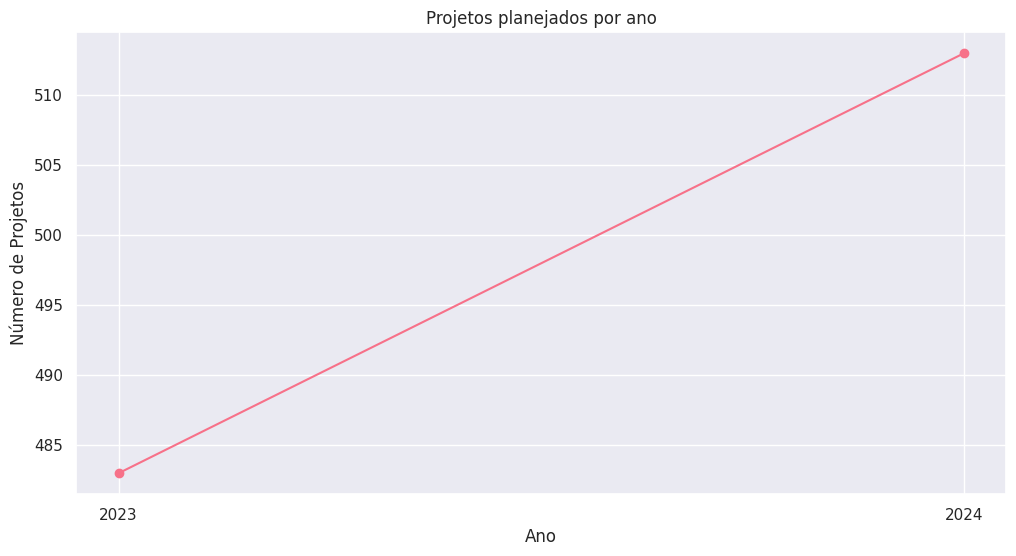

In [ ]:
plt.plot(projetos_por_ano.index, projetos_por_ano.values, marker='o')
plt.title('Projetos planejados por ano')  # Título do gráfico
plt.xlabel('Ano')  # Rótulo do eixo X
plt.ylabel('Número de Projetos')  # Rótulo do eixo Y
plt.xticks(projetos_por_ano.index)  # Ajustando os rótulos do eixo X
plt.grid(True)  # Exibe a grade no gráfico
plt.show()  # Exibe o gráfico

## 4 Gráfico 2: Gráfico de barras verticais das unidades com mais projetos em 2024

In [ ]:
plt.figure()  # Iniciando uma nova figura
projetos_2024 = df[df['Ano'] == 2024]['Unidade'].value_counts()  # Contagem de projetos por unidade em 2024

<Figure size 1200x600 with 0 Axes>

## 4.1 Criando o Gráfico de barras

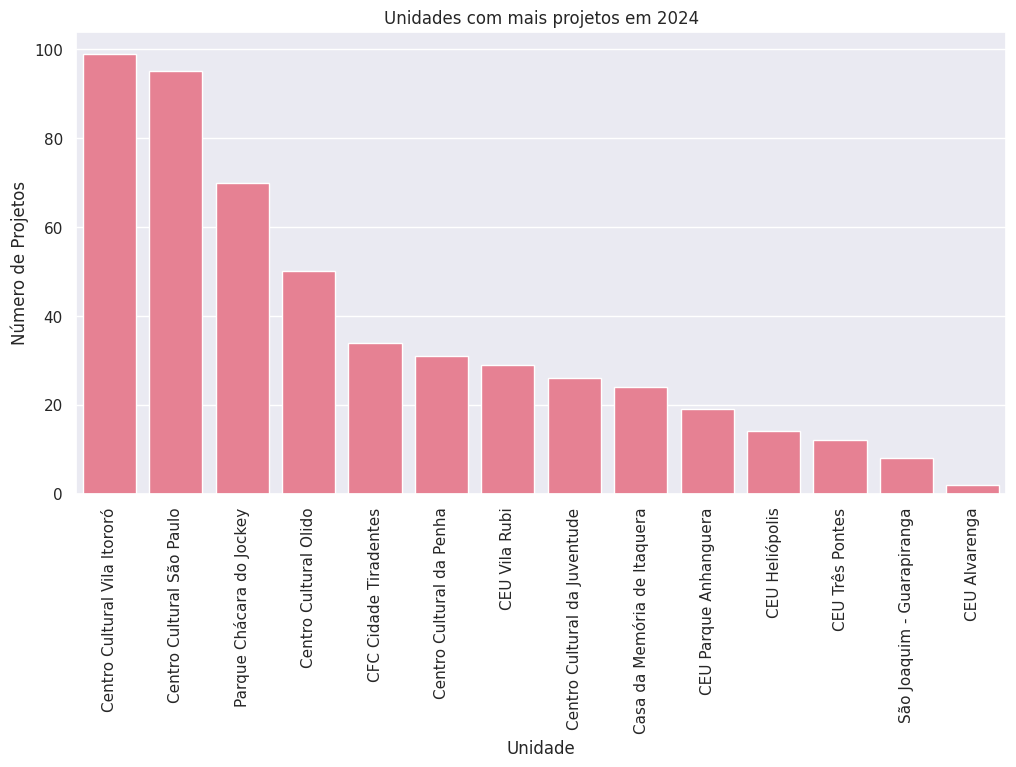

In [ ]:
sns.barplot(x=projetos_2024.index, y=projetos_2024.values)
plt.title('Unidades com mais projetos em 2024')  # Título do gráfico
plt.xlabel('Unidade')  # Rótulo do eixo X
plt.ylabel('Número de Projetos')  # Rótulo do eixo Y
plt.xticks(rotation=90)  # Rotacionando os rótulos no eixo X para evitar sobreposição
plt.show()  # Exibe o gráfico

## 5 Gráfico 3: Gráfico de barras temático dos projetos em 2024 (tema aleatório)

In [ ]:
plt.figure()  # Iniciando uma nova figura
projetos_2024_tema = df[df['Ano'] == 2024]['Temática'].value_counts()  # Contagem de projetos por tema em 2024

<Figure size 1200x600 with 0 Axes>

## 5.1 Criando Gráfico em barras

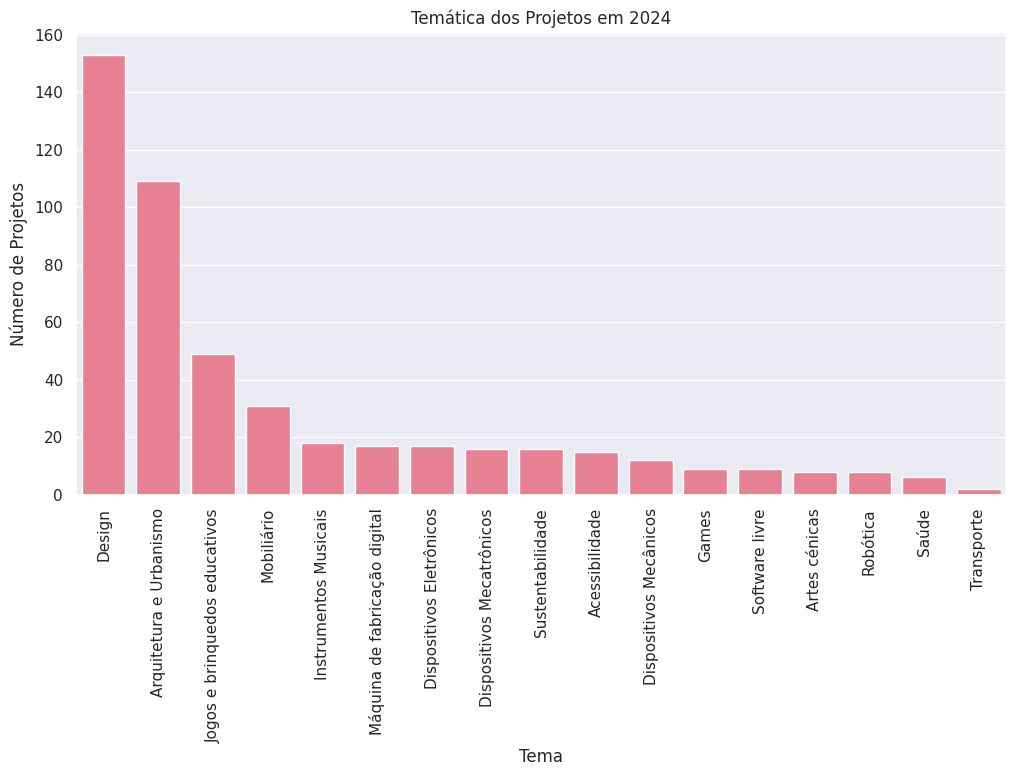

In [ ]:
sns.barplot(x=projetos_2024_tema.index, y=projetos_2024_tema.values)
plt.title('Temática dos Projetos em 2024')  # Título do gráfico
plt.xlabel('Tema')  # Rótulo do eixo X
plt.ylabel('Número de Projetos')  # Rótulo do eixo Y
plt.xticks(rotation=90)  # Rotacionando os rótulos no eixo X
plt.show()  # Exibe o gráfico

## 6 Gráfico 4: Gráfico de barras com área de atuação em 2024

In [ ]:
plt.figure()  # Iniciando uma nova figura
area_atuacao_2024 = df[df['Ano'] == 2024]['Área de atuação'].value_counts()  # Contagem de projetos por área em 2024

<Figure size 1200x600 with 0 Axes>

## 6.1 Criando Gráfico de barras

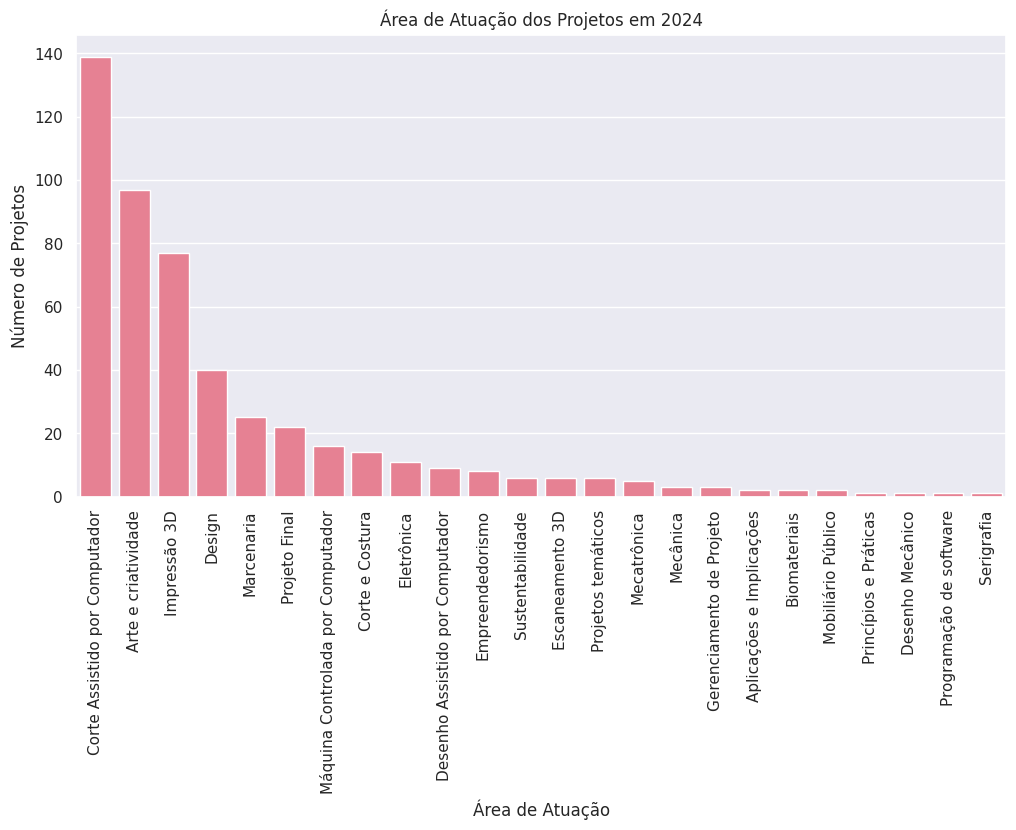

In [ ]:
sns.barplot(x=area_atuacao_2024.index, y=area_atuacao_2024.values)
plt.title('Área de Atuação dos Projetos em 2024')  # Título do gráfico
plt.xlabel('Área de Atuação')  # Rótulo do eixo X
plt.ylabel('Número de Projetos')  # Rótulo do eixo Y
plt.xticks(rotation=90)  # Rotacionando os rótulos no eixo X
plt.show()  # Exibe o gráfico

## 7 Gráfico 5: Gráficos de barras com gênero em 2024.

In [ ]:
plt.figure()  # Iniciando uma nova figura
genero_2024 = df[df['Ano'] == 2024]['Gênero'].value_counts()  # Contagem por gênero em 2024

<Figure size 1200x600 with 0 Axes>

## 7.1 Criando Gráfico de barras

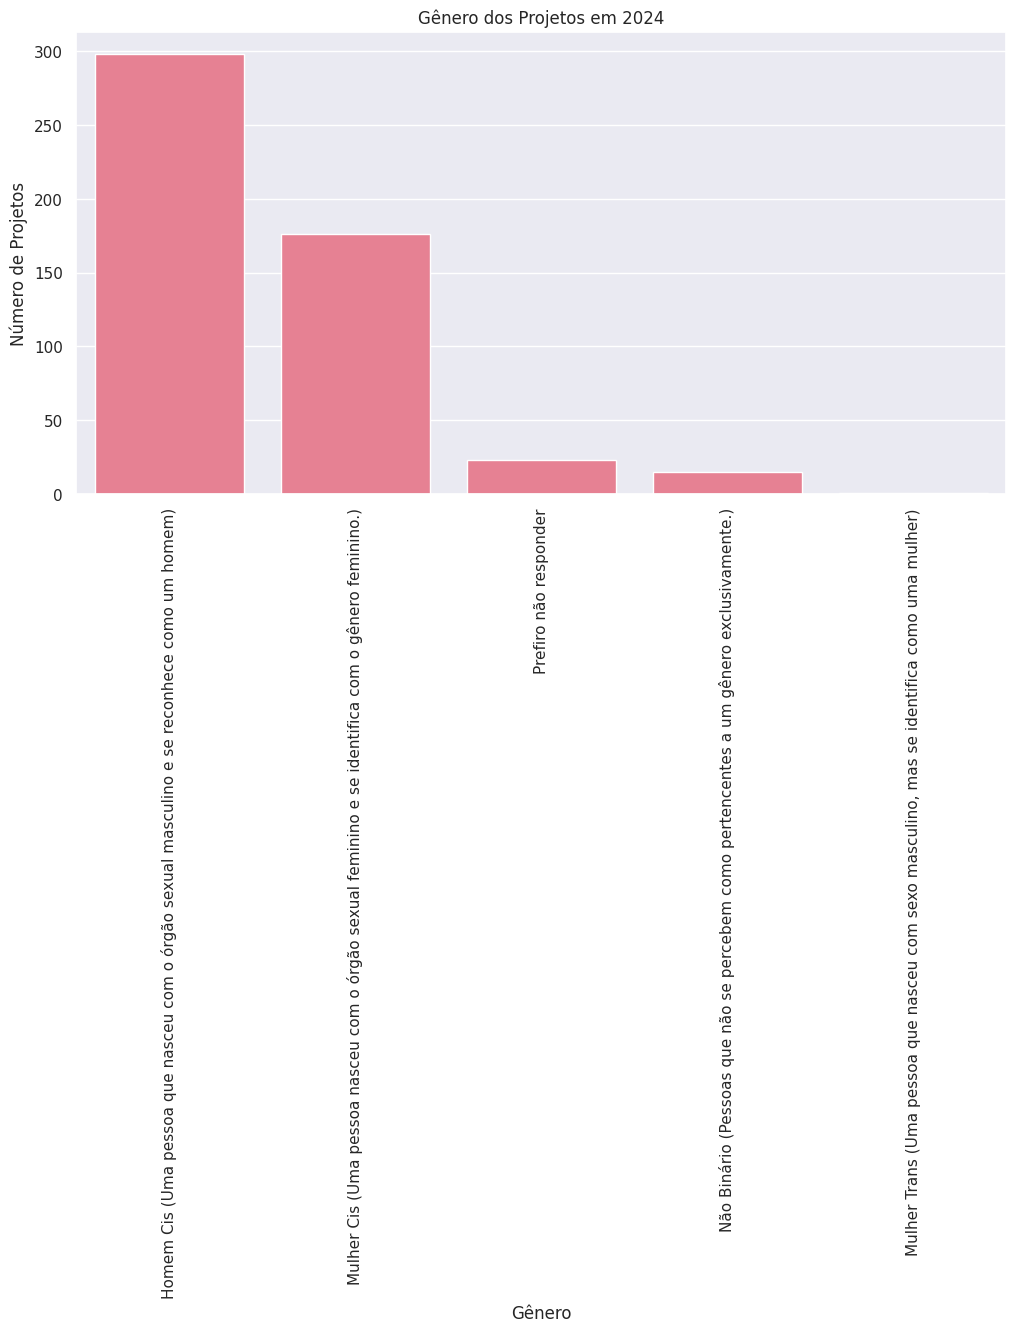

In [ ]:
sns.barplot(x=genero_2024.index, y=genero_2024.values)
plt.title('Gênero dos Projetos em 2024')  # Título do gráfico
plt.xlabel('Gênero')  # Rótulo do eixo X
plt.ylabel('Número de Projetos')  # Rótulo do eixo Y
plt.xticks(rotation=90)  # Rotacionando os rótulos no eixo X
plt.show()  # Exibe o gráfico

## 8 Caminho para salvar o script


In [ ]:
dir_path = r'C:\Users\x405294\Documents\Script - Python\BD Projetos'
script_path = os.path.join(dir_path, 'script_final.py')

## 8.1 Verificando se o diretório existe, caso contrário, cria


In [ ]:
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

## 8.2 Caminho completo para o script

In [ ]:
script_path = os.path.join(dir_path, 'script_final.py')

## 8.3 Salvando o script final em um arquivo .py

In [ ]:
with open(script_path, 'w', encoding='utf-8') as script_file:
    script_file.write("Script de geração de gráficos concluído com sucesso.\n")
    script_file.write("Gráficos gerados e salvos conforme as instruções.\n")
    print(f"Script salvo em: {script_path}")

Script salvo em: C:\Users\x405294\Documents\Script - Python\BD Projetos/script_final.py
